<a href="https://colab.research.google.com/github/SamarthRaina19/Repository-1/blob/main/DS_Lab_14thAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/WineQT.csv")
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1143 non-null   int64  
 1   fixed acidity         1143 non-null   float64
 2   volatile acidity      1143 non-null   float64
 3   citric acid           1143 non-null   float64
 4   residual sugar        1143 non-null   float64
 5   chlorides             1143 non-null   float64
 6   free sulfur dioxide   1143 non-null   float64
 7   total sulfur dioxide  1143 non-null   float64
 8   density               1143 non-null   float64
 9   pH                    1143 non-null   float64
 10  sulphates             1143 non-null   float64
 11  alcohol               1143 non-null   float64
 12  quality               1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
                Id  fixed acidity  volatile acidity  citric acid  \
co

In [ ]:
print(df.head())
print(df.tail())
print(df.columns)
print(df.isnull().sum())

   Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            7.4              0.70         0.00             1.9   
1   1            7.8              0.88         0.00             2.6   
2   2            7.8              0.76         0.04             2.3   
3   3           11.2              0.28         0.56             1.9   
4   4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        

In [ ]:
data = df.drop(['Id'], axis=1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB
None


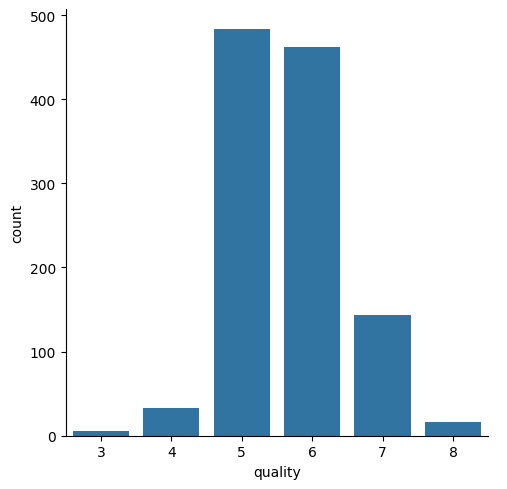

In [31]:
sns.catplot(x='quality', data=data, kind='count')

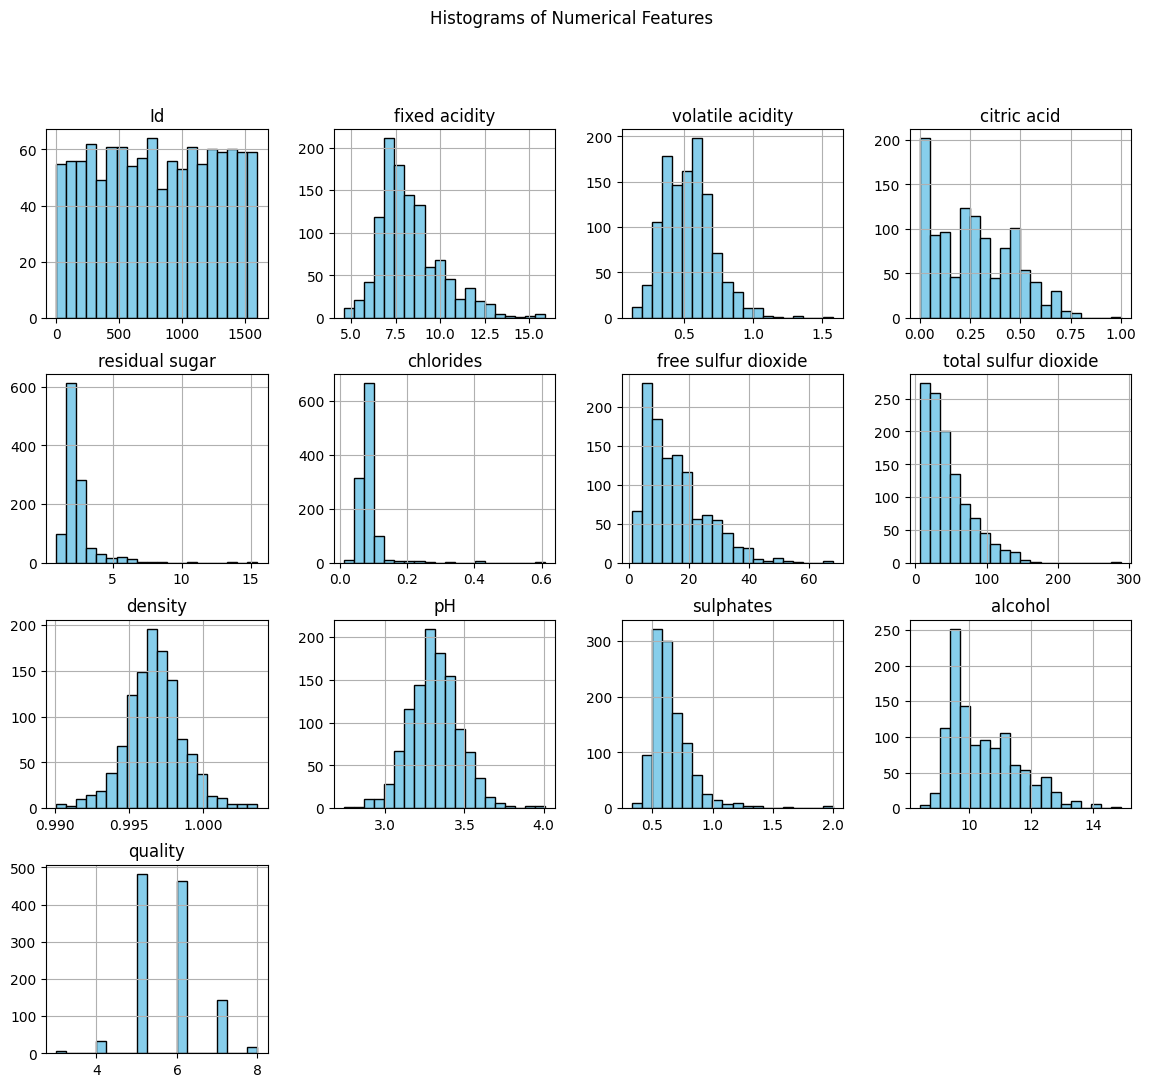

In [ ]:
df.hist(figsize=(14, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

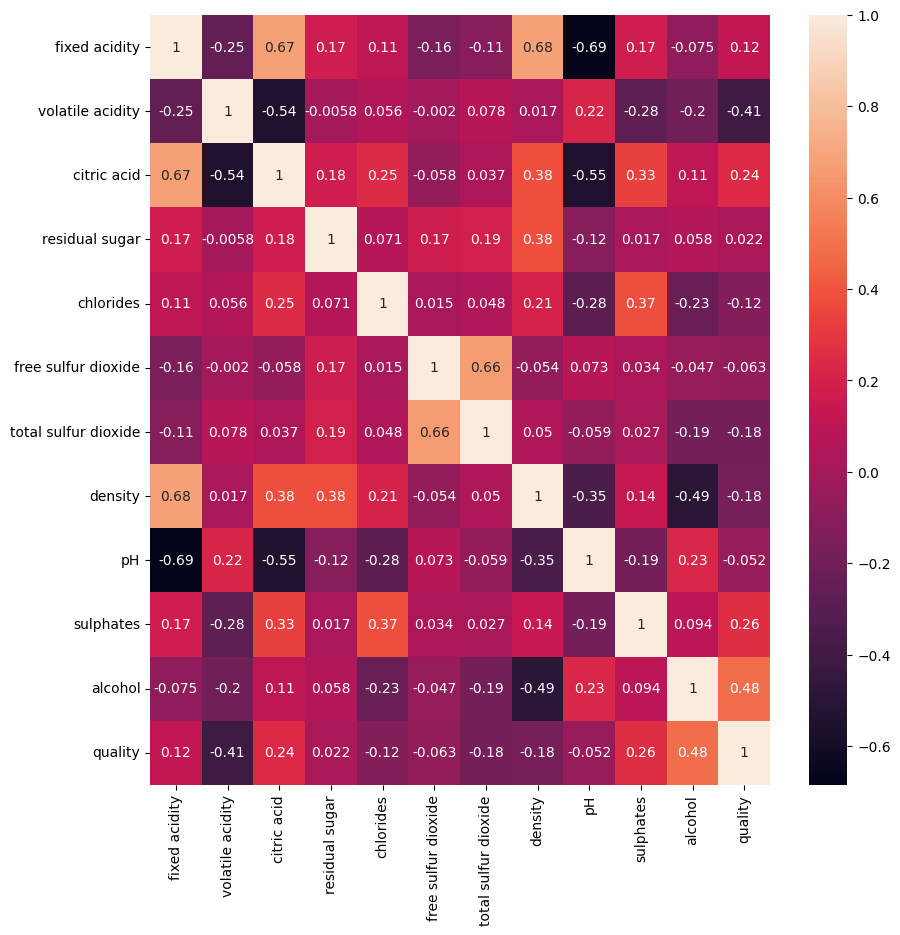

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), color="k", annot=True)
plt.show()

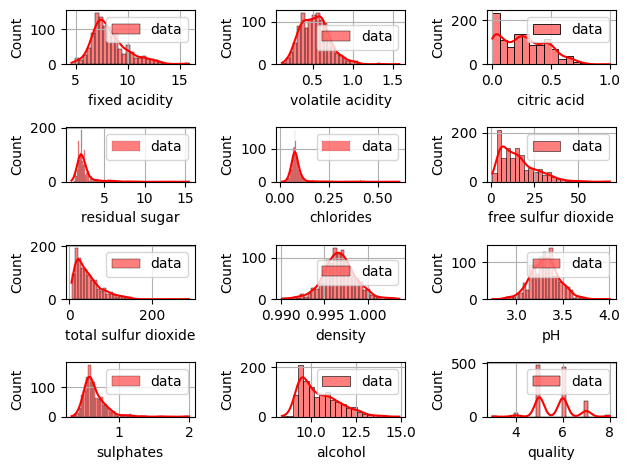

In [ ]:
num_cols = len(data.columns)
cols_per_row = 3
rows = (num_cols + cols_per_row - 1) // cols_per_row
for i, col in enumerate(data.columns):
 plt.subplot(rows, cols_per_row, i + 1)
 sns.histplot(data[col], color='r', kde=True, label='data')
 plt.grid()
 plt.legend()
plt.tight_layout()
plt.show()

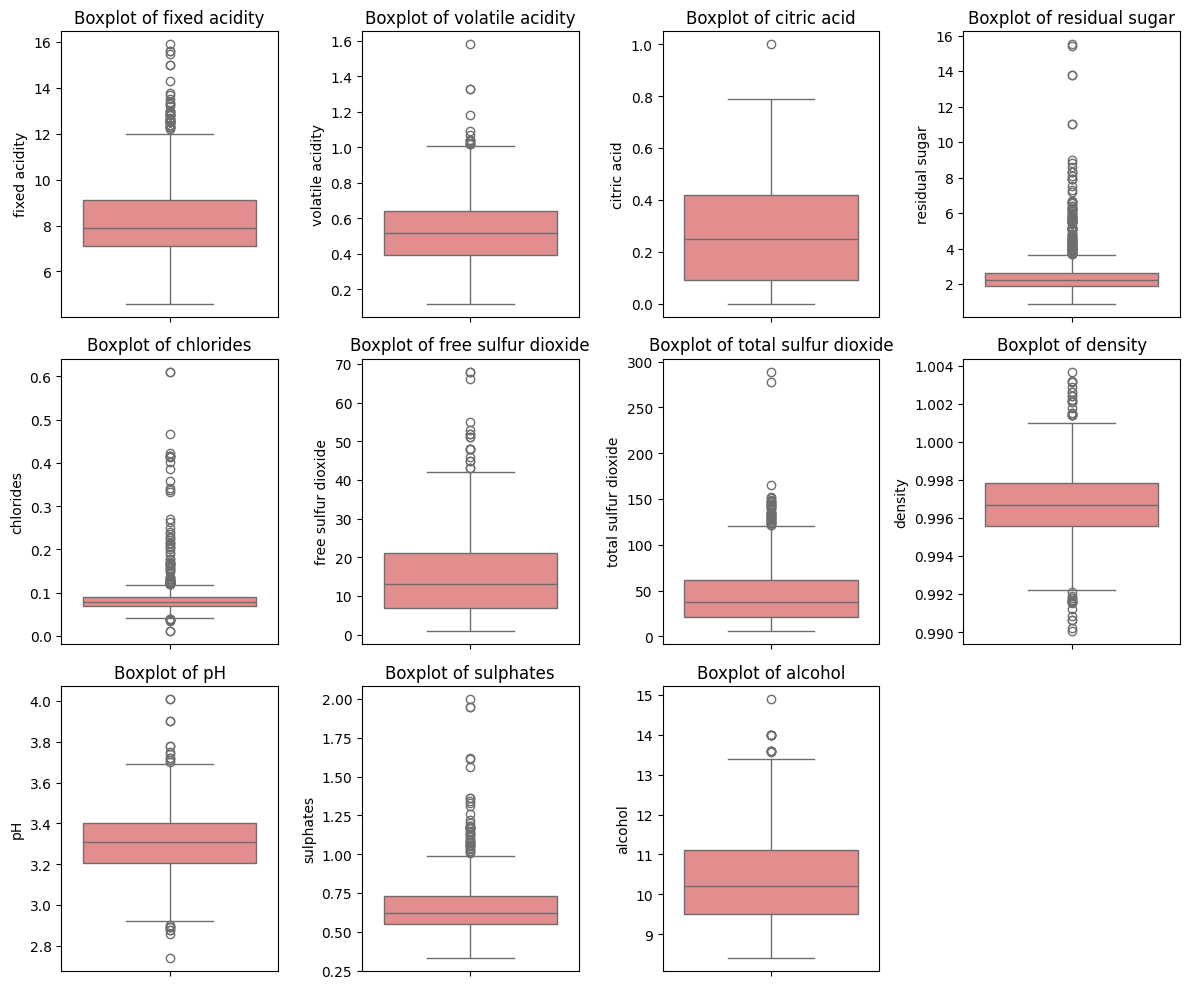

In [33]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns[:-1]):
 plt.subplot(3, 4, i+1)
 sns.boxplot(y=data[column], color='lightcoral')
 plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers_iqr(data):
    df_clean = data.copy()
    for column in data.columns:
        if data[column].dtype in [np.int64, np.float64]:
            Q1 = df_clean[column].quantile(0.25)
            Q3 = df_clean[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

    return df_clean

df_cleaned = remove_outliers_iqr(df)
print(f"Original dataset size: {df.shape}")
print(f"Cleaned dataset size: {df_cleaned.shape}")

Original dataset size: (1143, 13)
Cleaned dataset size: (787, 13)


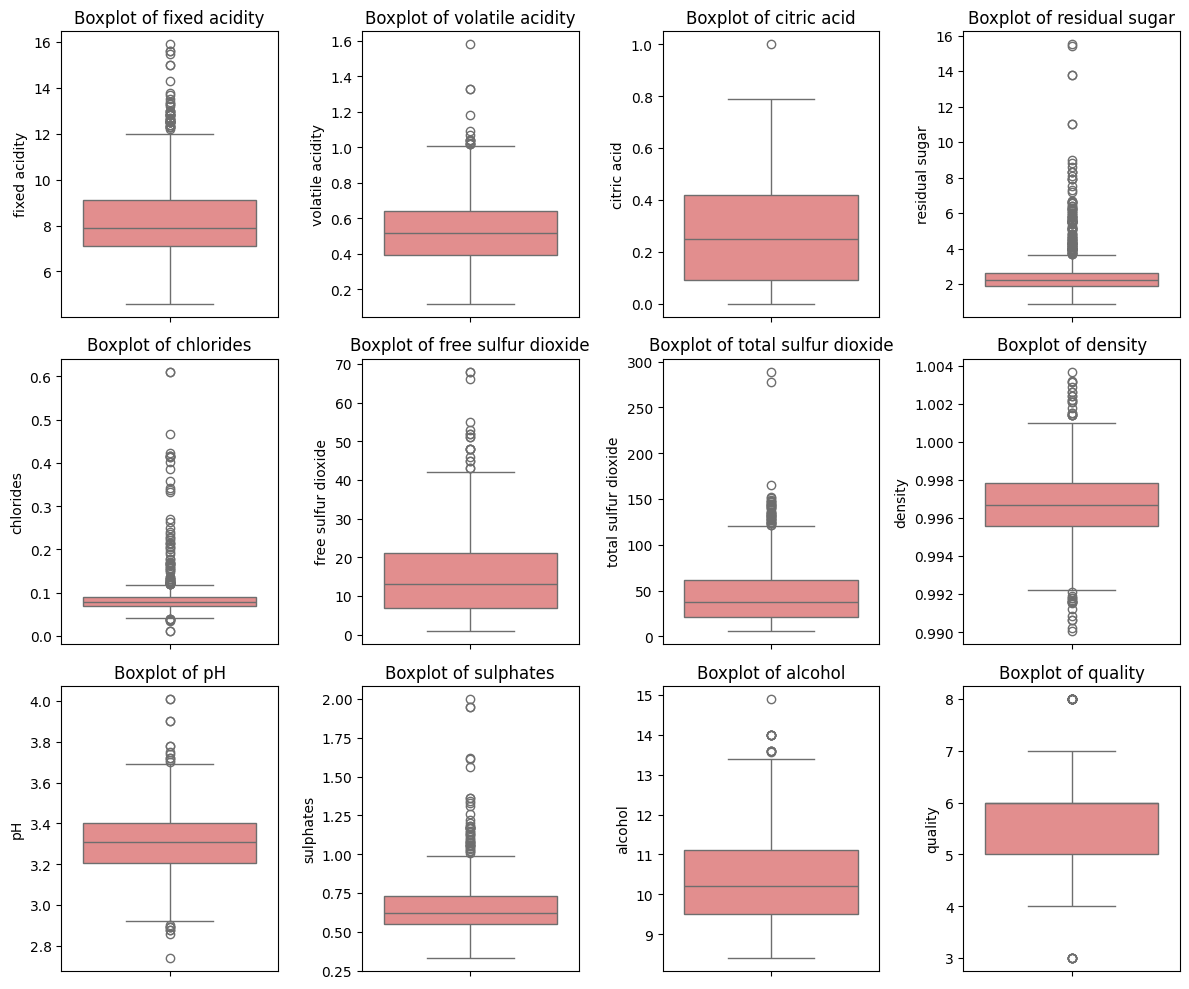

In [ ]:

df_cleaned = df.drop(['Id'], axis=1).select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))

for i, column in enumerate(df_cleaned.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df_cleaned[column], color='lightcoral')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import kurtosis,skew

In [ ]:
df = pd.read_csv("/WineQT.csv")
data = df.drop(['Id'], axis=1)
print(data.head())

kurtosis_values = data.apply(lambda x: kurtosis(x, fisher=False) if x.dtype != 'object' else None)

print("Kurtosis values for each numerical column:")
print(kurtosis_values)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
skewness_values = data.apply(lambda x: skew(x) if np.issubdtype(x.dtype, np.number) else None)

print("Skewness values for each numerical column:")
print(skewness_values)


Skewness values for each numerical column:
fixed acidity           1.043558
volatile acidity        0.680653
citric acid             0.371073
residual sugar          4.355371
chlorides               6.018449
free sulfur dioxide     1.229645
total sulfur dioxide    1.663579
density                 0.102261
pH                      0.220848
sulphates               2.493988
alcohol                 0.862180
quality                 0.286415
dtype: float64


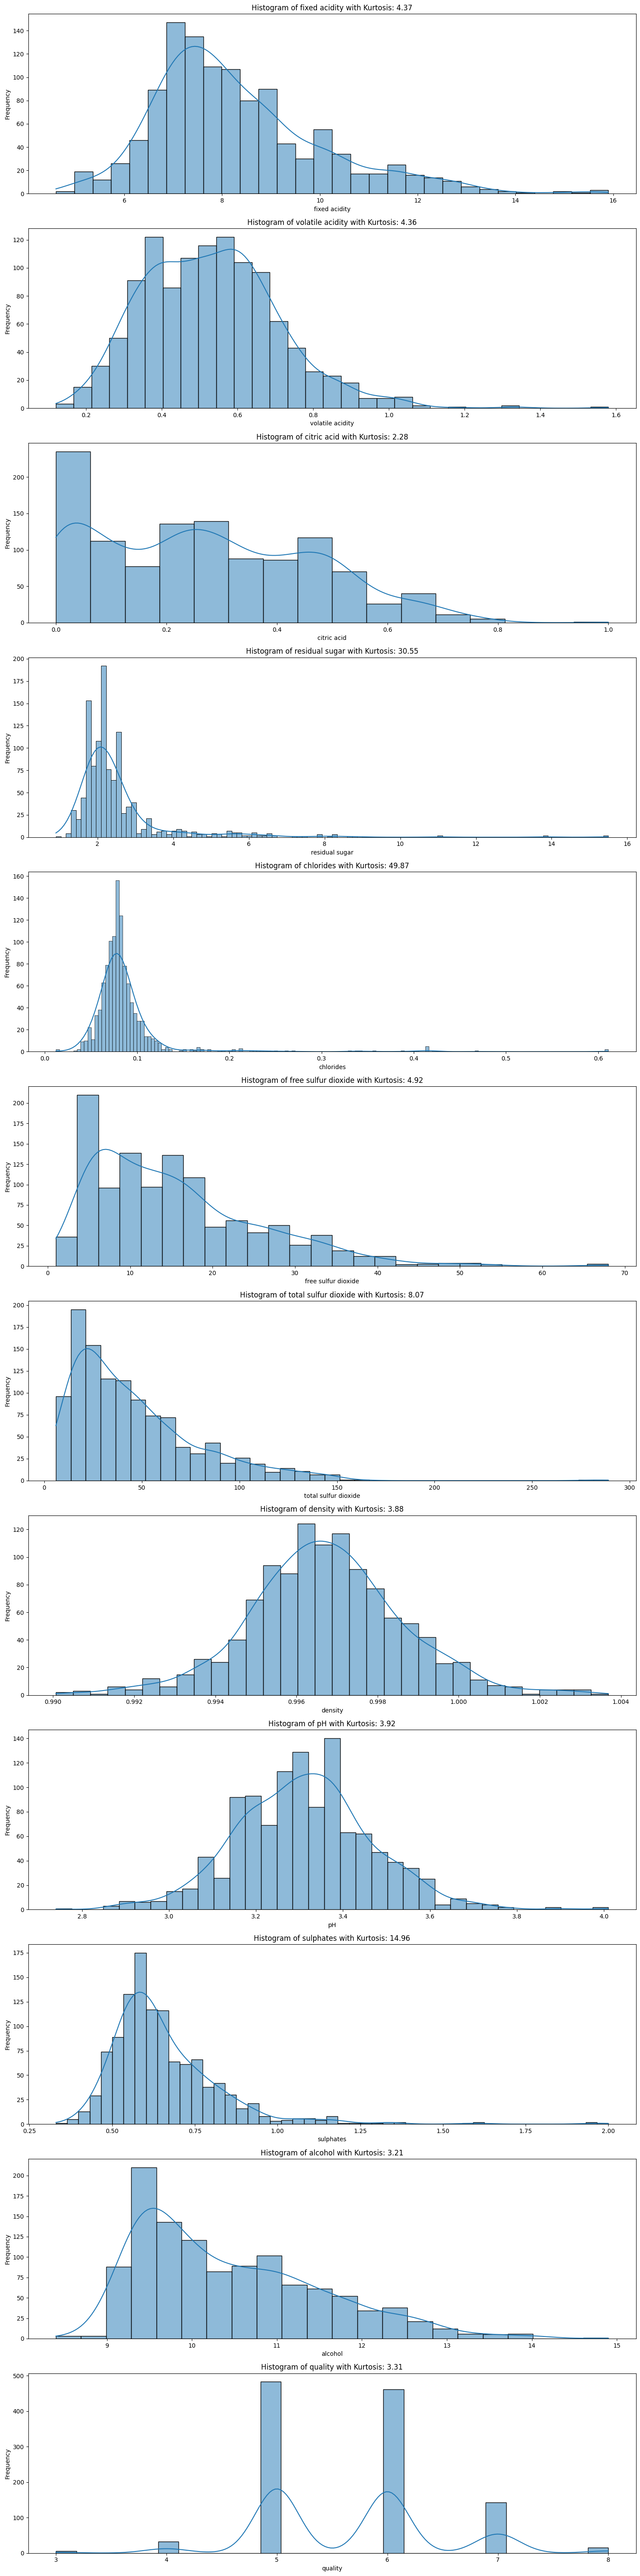

In [ ]:
num_columns = data.select_dtypes(include=[np.number]).columns
num_plots = len(num_columns)

num_columns = data.select_dtypes(include=[np.number]).columns
num_plots = len(num_columns)
plt.figure(figsize=(15, num_plots * 5))
for i, col in enumerate(num_columns):
 plt.subplot(num_plots, 1, i + 1)
 sns.histplot(data[col], kde=True)
 plt.title(f'Histogram of {col} with Kurtosis: {kurtosis_values[col]:.2f}')
 plt.xlabel(col)
 plt.ylabel('Frequency')
plt.tight_layout()
plt.show()